## Context
This dataset (ml-20m) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17,

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in six files, genome-scores.csv, genome-tags.csv, links.csv, movies.csv, ratings.csv and tags.csv. More details about the contents and use of all these files follows.

This and other GroupLens data sets are publicly available for download at http://grouplens.org/datasets/.
<br/><br/> 
## Content

*    [Importing libs](#importlibs)
*    [Reading Datasets](#importdata)
*    [MovieLen Datamodel Description](ml-20m-README.md)
*    [Base Rating Statistics](#stat-ratings)

<a name="importlibs"></a>
<div style = \"font-size : 20px; color : white ; font-family : 'Comic Sans MS'; border-radius:5px;text-align: left; background-color: #021841ff\" role=\"alert\">
 <br>
 &nbsp;&nbsp;Importing libs and reading the dataset
 <br></br>
</div>

In [100]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

<a name="importdata"></a>

In [101]:
df_rates=pd.read_csv('Ressources/MovieLens/ratings.csv')
df_tags=pd.read_csv('Ressources/MovieLens/tags.csv')

<a name="stat-ratings"></a>
<div style = \"font-size : 20px; color : white ; font-family : 'Comic Sans MS'; border-radius:5px;text-align: left; background-color: #021841ff\" role=\"alert\">
 <br>
 &nbsp;&nbsp;Basic Rating Statistics
 <br></br>
</div>

In [134]:
df_rates_desc=df_rates.describe()
df_rates_desc.loc['dtype']=df_rates.dtypes
df_rates_desc.loc['size']=len(df_rates)
df_rates_desc.loc['#unique values']=df_rates.apply(lambda col: len(col.unique()) )
df_rates_desc.loc['25% uvalue counts']=df_rates.apply(lambda col: col.value_counts().quantile(q=0.25) )
df_rates_desc.loc['50% uvalue counts']=df_rates.apply(lambda col: col.value_counts().quantile(q=0.50) )
df_rates_desc.loc['75% uvalue counts']=df_rates.apply(lambda col: col.value_counts().quantile(q=0.75) )
print("Describe ratings\n",df_rates)

###Extrem Values
# Should we exclude ratings from Users who gave votes for more movies than usual
# Should we exclude ratings where we have less ratings?
df_rates_userid_counts=df_rates.userId.value_counts().to_frame("Counts")
df_rates_userid_counts_quantile=df_rates_userid_counts.quantile(q=[0.25,0.5,0.75])
df_rates_userid_counts_extrem=(df_rates_userid_counts_quantile.iloc[2,0]-df_rates_userid_counts_quantile.iloc[0,0])*1.5+df_rates_userid_counts_quantile.iloc[2,0]
df_rates.loc[:,'isuseridextrem']=df_rates.userId.isin(df_rates_userid_counts[df_rates_userid_counts.Counts>=df_rates_userid_counts_extrem].index.values)

df_rates_movie_counts = df_rates.movieId.value_counts().to_frame("Counts")
df_rates_movie_counts_quantile = df_rates_movie_counts.quantile(q=[0.25, 0.5, 0.75])

df_tags_userid_counts=df_tags.userId.value_counts().to_frame("Counts")
df_tags_userid_counts_quantile=df_tags_userid_counts.quantile(q=[0.25,0.5,0.75])
df_tags_userid_counts_extrem=(df_tags_userid_counts_quantile.iloc[2,0]-df_tags_userid_counts_quantile.iloc[0,0])*1.5+df_tags_userid_counts_quantile.iloc[2,0]

print("Number of extrem votes:",df_rates_userid_counts_extrem)
print("Number of Ratings from extrem highly voting users:",df_rates_userid_counts[df_rates_userid_counts.Counts>df_rates_userid_counts_extrem].sum().iloc[0], "Number of Users", df_rates_userid_counts[df_rates_userid_counts.Counts>df_rates_userid_counts_extrem].count().iloc[0])
print("Number of Ratings from normal voting users:",df_rates_userid_counts[df_rates_userid_counts.Counts<=df_rates_userid_counts_extrem].sum().iloc[0], "Number of Users", df_rates_userid_counts[df_rates_userid_counts.Counts<=df_rates_userid_counts_extrem].count().iloc[0])

Describe ratings                         userId       movieId      rating          timestamp
count               20000263.0    20000263.0  20000263.0         20000263.0
mean              69045.872583    9041.56733    3.525529  1100917921.677118
std               40038.626653  19789.477445    1.051989   162169424.782724
min                        1.0           1.0         0.5        789652004.0
25%                    34395.0         902.0         3.0        966797745.0
50%                    69141.0        2167.0         3.5       1103555886.0
75%                   103637.0        4770.0         4.0       1225642317.5
max                   138493.0      131262.0         5.0       1427784002.0
dtype                    int64         int64     float64              int64
size                  20000263      20000263    20000263           20000263
#unique values          138493         26744          10           15351121
25% Value Counts          35.0           3.0    731398.5               

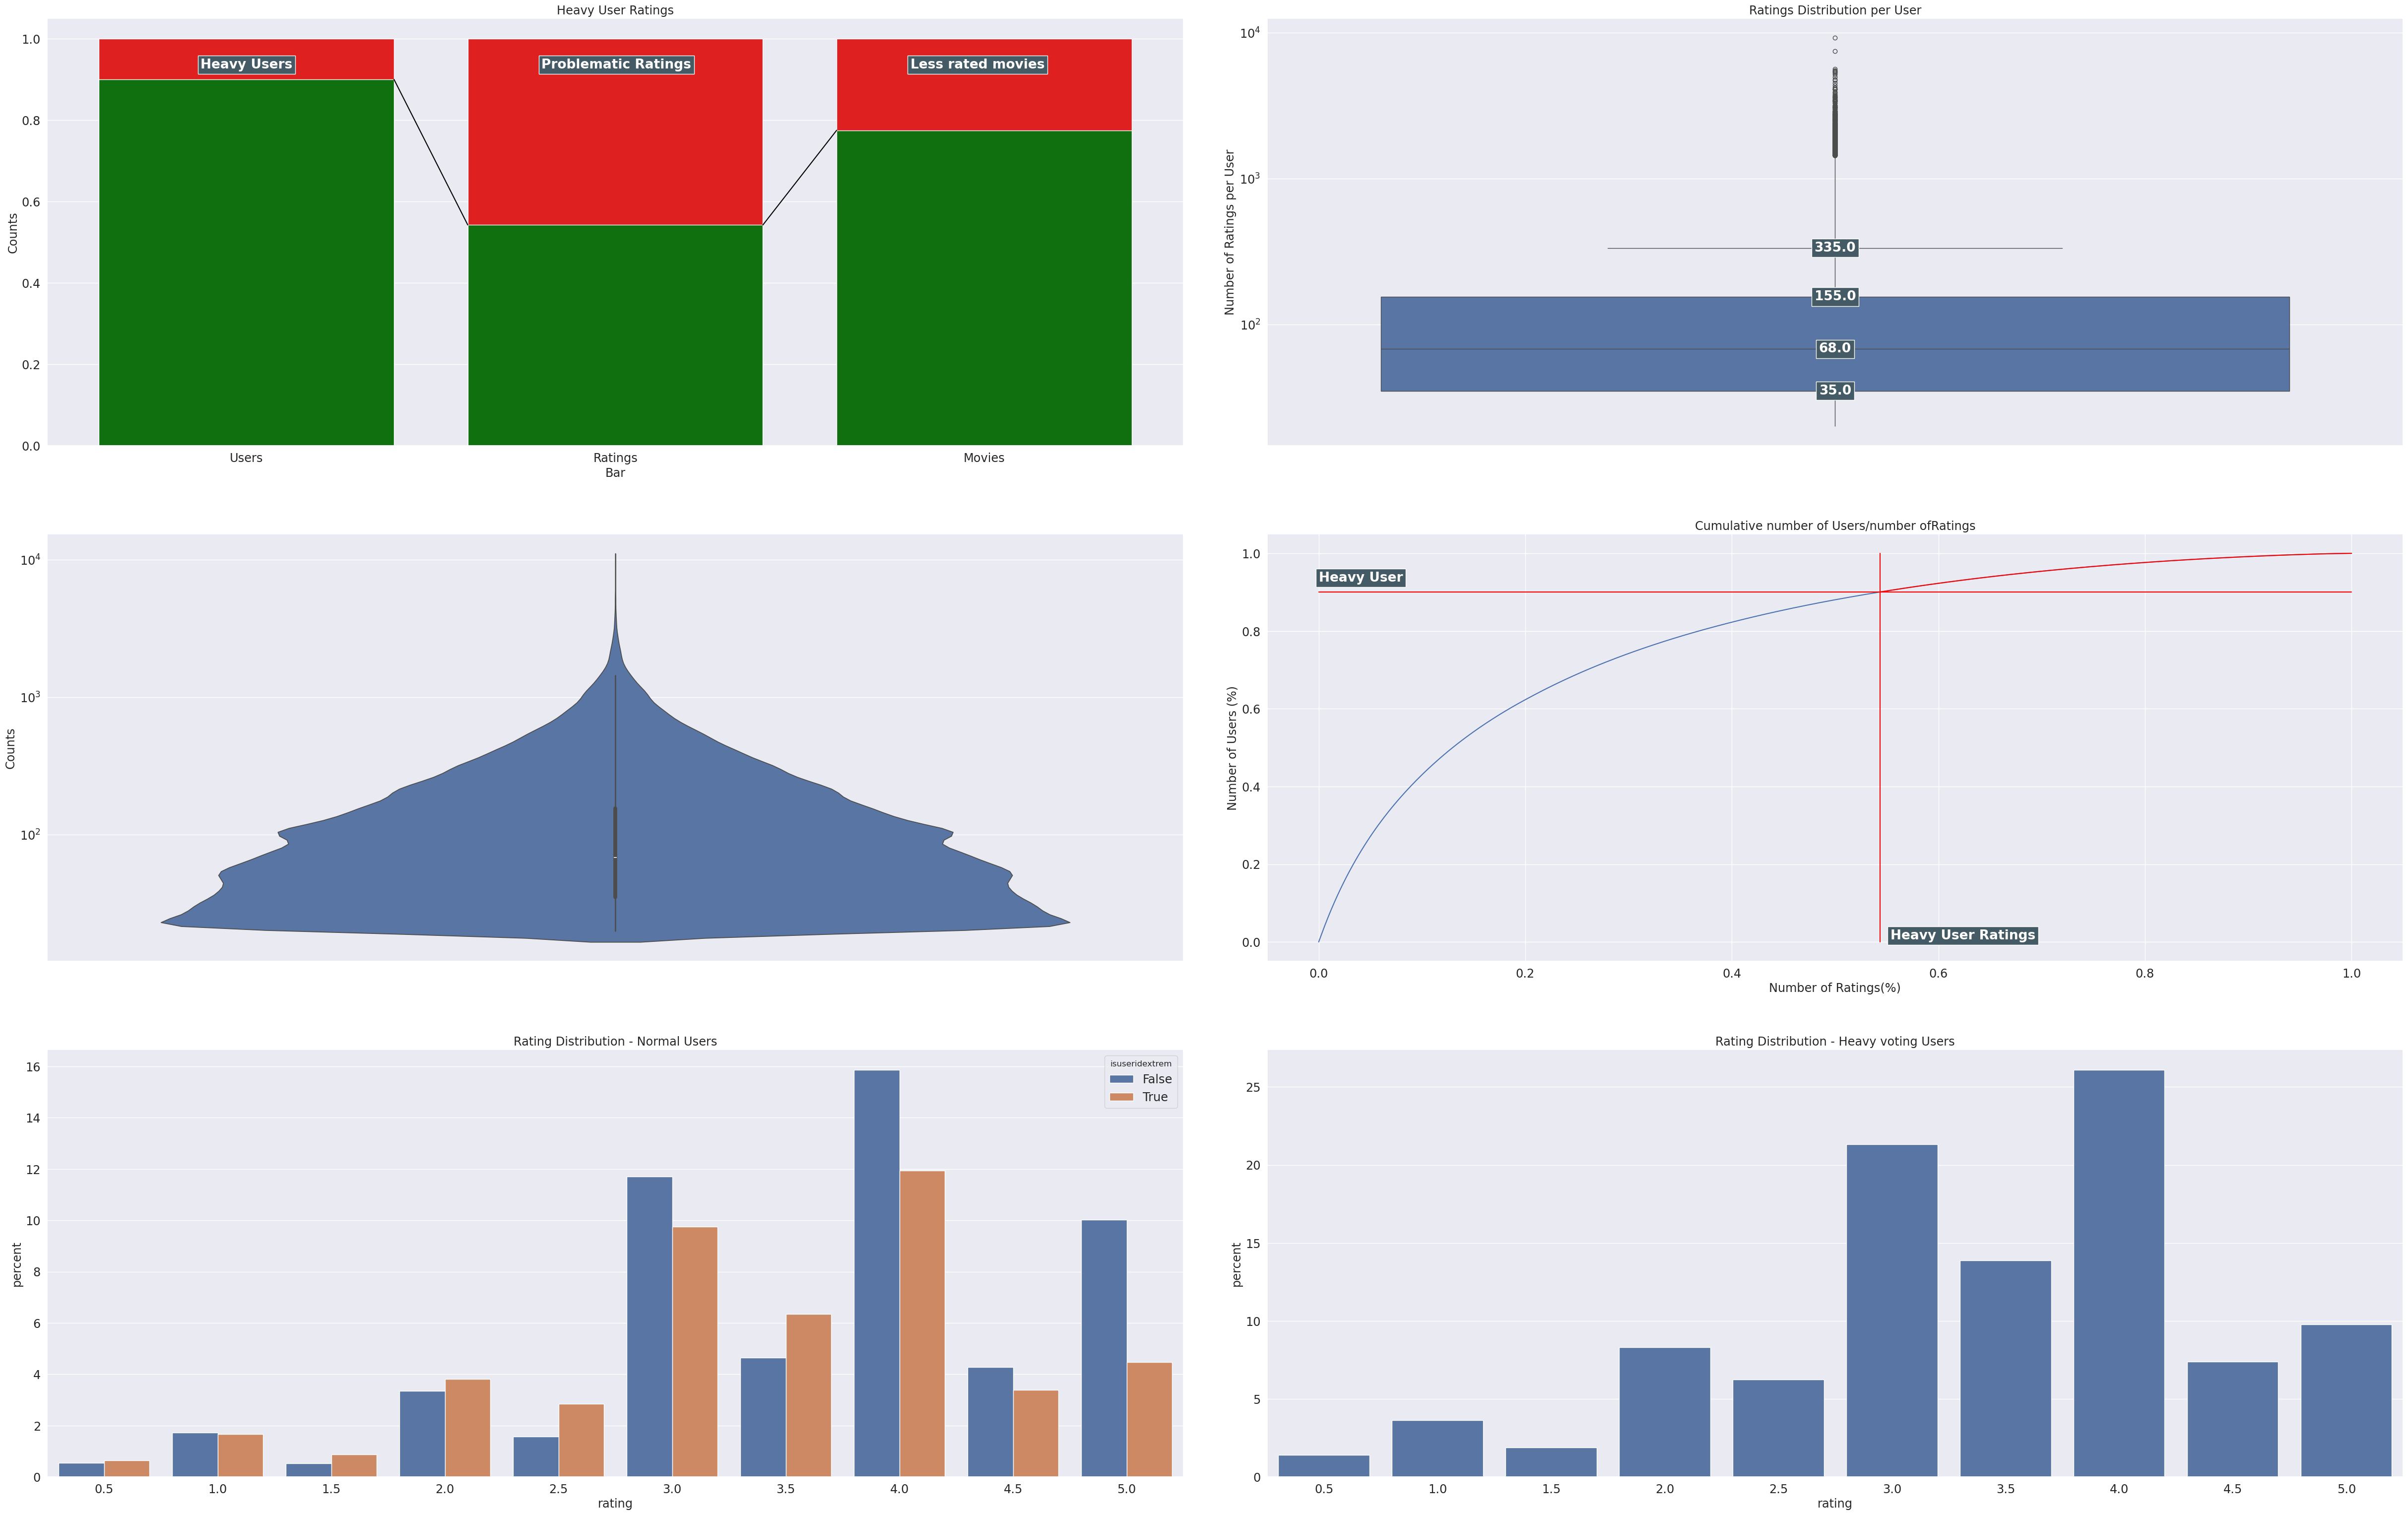

In [103]:
sns.set()

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
fig,axes=plt.subplots(3,2,figsize=(50,32))
axes1=axes[0,0]
axes2=axes[1,0]
axes3=axes[0,1]
axes4=axes[1,1]
axes5=axes[2,0]
axes6=axes[2,1]
#axes7=axes[3,0]
#axes8=axes[3,1]

###############
# Bar
###############
axes1.set_title("Heavy User Ratings")
sns.barplot(x="Bar",y="Counts",data=pd.DataFrame({"Bar":["Users"],"Counts":[1]}),color="red",ax=axes1)
sns.barplot(x="Bar",y="Counts",data=pd.DataFrame({"Bar":["Users"],"Counts":[(df_rates_userid_counts[df_rates_userid_counts.Counts<df_rates_userid_counts_extrem].count()/df_rates_userid_counts.count()).iloc[0]]}),color="green",ax=axes1)
sns.barplot(x="Bar",y="Counts",data=pd.DataFrame({"Bar":["Ratings"],"Counts":[1]}),color="red",ax=axes1)
sns.barplot(x="Bar",y="Counts",data=pd.DataFrame({"Bar":["Ratings"],"Counts":[(df_rates_userid_counts[df_rates_userid_counts.Counts<df_rates_userid_counts_extrem]["Counts"].sum()/ df_rates_userid_counts.Counts.sum())]}),color="green",ax=axes1)

sns.barplot(x="Bar",y="Counts",data=pd.DataFrame({"Bar":["Movies"],"Counts":[1]}),color="red",ax=axes1)
sns.barplot(x="Bar",y="Counts",data=pd.DataFrame({"Bar":["Movies"],"Counts":[(df_rates_movie_counts[df_rates_movie_counts.Counts>=3].count()/df_rates_movie_counts.count()).iloc[0]]}),color="green",ax=axes1)

lplot1=pd.DataFrame({"x":[1.4,1.6],"y":[(df_rates_userid_counts[df_rates_userid_counts.Counts<df_rates_userid_counts_extrem]["Counts"].sum()/ df_rates_userid_counts.Counts.sum()),
                                       1-(df_rates_movie_counts[df_rates_movie_counts.Counts<3].count()/df_rates_movie_counts.count()).iloc[0]]})

lplot=pd.DataFrame({"x":[0.4,0.6],"y":[(df_rates_userid_counts[df_rates_userid_counts.Counts<df_rates_userid_counts_extrem].count()/df_rates_userid_counts.count()).iloc[0],(df_rates_userid_counts[df_rates_userid_counts.Counts<df_rates_userid_counts_extrem]["Counts"].sum()/ df_rates_userid_counts.Counts.sum())]})

sns.lineplot(data=lplot,x="x",y="y",color="black",ax=axes1)
sns.lineplot(data=lplot1,x="x",y="y",color="black",ax=axes1)

y=(df_rates_userid_counts[df_rates_userid_counts.Counts<df_rates_userid_counts_extrem].count()/df_rates_userid_counts.count()).iloc[0]+0.02
axes1.text(0.0005,y,"Heavy Users",ha='center',va='bottom',size=19,fontweight='bold',color='white',bbox=dict(facecolor='#445A64'))
axes1.text(1.8,y,"Less rated movies",ha='left',va='bottom',size=19,fontweight='bold',color='white',bbox=dict(facecolor='#445A64'))
axes1.text(0.8,y,"Problematic Ratings",ha='left',va='bottom',size=19,fontweight='bold',color='white',bbox=dict(facecolor='#445A64'))
###############
# Violine
###############
sns.violinplot(y='Counts', data=df_rates.groupby(by='userId').size().to_frame("Counts"), log_scale=True,ax=axes2)

###############
# Boxplot
###############
box_plot=sns.boxplot(y='Counts',data=df_rates.userId.value_counts().to_frame("Counts"),log_scale=True,ax=axes3)
ax=box_plot.axes
lines=ax.get_lines()
categories=ax.get_xticks()

#Set Extrem values vor whiskers as these are incorrect with log_scale = True
lines[3+categories[0]*6].set_ydata(y=[df_rates_userid_counts_extrem, df_rates_userid_counts_extrem])
lines[2+categories[0]*6].set_ydata(y=[0, 0])

# Show Values
# 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
y = round(lines[4+categories[0]*6].get_ydata()[0],1)
ax.text(categories[0],y,f'{y}',ha='center',va='center',size=19,fontweight='bold',color='white',bbox=dict(facecolor='#445A64'))
y = round(lines[3+categories[0]*6].get_ydata()[0],1)
ax.text(categories[0],y,f'{y}',ha='center',va='center',size=19,fontweight='bold',color='white',bbox=dict(facecolor='#445A64'))
y = round(lines[1+categories[0]*6].get_ydata()[0],1)
ax.text(categories[0],y,f'{y}',ha='center',va='center',size=19,fontweight='bold',color='white',bbox=dict(facecolor='#445A64'))
y = round(lines[0+categories[0]*6].get_ydata()[0],1)
ax.text(categories[0],y,f'{y}',ha='center',va='center',size=19,fontweight='bold',color='white',bbox=dict(facecolor='#445A64'))
box_plot.figure.tight_layout()
ax.set_title('Ratings Distribution per User')
ax.set_ylabel('Number of Ratings per User')
ax.set_xlabel('')

###############
# Cumlative Plot of Users/Ratings
###############
# Calculate Cumulated Sum of the percentage of votes per userid
p = np.cumsum(df_rates_userid_counts.sort_values(by='Counts',ascending=True) / df_rates_userid_counts.sum())
#p=p.to_frame("Cumulative Ratings(%)")
#p1=p[p.reset_index().index>len(df_rates_userid_counts[df_rates_userid_counts.Counts>335])]
p1=p[len(p)-1-p.reset_index().index<len(df_rates_userid_counts[df_rates_userid_counts.Counts>df_rates_userid_counts_extrem])]

axes4.plot(p, 1. * np.arange(len(p)) / (len(p) - 1))
axes4.plot(p1, (1. * np.arange(len(p)) / (len(p) - 1))[len(p)-len(p1):len(p)],color='red')
#axes4.plot([p1.iloc[0,0],p1.iloc[0,0]],[0,(1. * np.arange(len(p)) / (len(p) - 1))[len(p)-len(p1)]],color='red')
#axes4.plot([0,p1.iloc[0,0]],[(1. * np.arange(len(p)) / (len(p) - 1))[len(p)-len(p1)],(1. * np.arange(len(p)) / (len(p) - 1))[len(p)-len(p1)]],color='red')
axes4.plot([p1.iloc[0,0],p1.iloc[0,0]],[0,1],color='red')
axes4.plot([0,1],[(1. * np.arange(len(p)) / (len(p) - 1))[len(p)-len(p1)],(1. * np.arange(len(p)) / (len(p) - 1))[len(p)-len(p1)]],color='red')
axes4.text(p1.iloc[0,0]+0.01,0,"Heavy User Ratings",ha='left',va='bottom',size=19,fontweight='bold',color='white',bbox=dict(facecolor='#445A64'))
axes4.text(0,(1. * np.arange(len(p)) / (len(p) - 1))[len(p)-len(p1)]+0.02,"Heavy User",ha='left',va='bottom',size=19,fontweight='bold',color='white',bbox=dict(facecolor='#445A64'))

#axes4.plot(df_rates_userid_counts_extrem)
axes4.set_xlabel('Number of Ratings(%)')
axes4.set_ylabel('Number of Users (%)')
axes4.set_title('Cumulative number of Users/number ofRatings')

###############
# Ratings - Normal voting users
###############
axes5.set_title('Rating Distribution - Normal Users')
#sns.countplot(data=df_rates[df_rates.userId.isin(df_rates_userid_counts[df_rates_userid_counts.Counts<df_rates_userid_counts_extrem].index.values)],x="rating",stat="percent",ax=axes5)
sns.countplot(data=df_rates,x="rating",stat="percent",hue="isuseridextrem",ax=axes5)

###############
# Ratings - Heavy voting users
###############
axes6.set_title('Rating Distribution - Heavy voting Users')
sns.countplot(data=df_rates[df_rates.userId.isin(df_rates_userid_counts[df_rates_userid_counts.Counts>=df_rates_userid_counts_extrem].index.values)],x="rating",stat="percent",ax=axes6)


###############
# Bar
###############
"""
axes7.set_title("Heavy User Tags")
sns.barplot(x="Bar",y="Counts",data=pd.DataFrame({"Bar":["Users"],"Counts":[1]}),color="red",ax=axes7)
sns.barplot(x="Bar",y="Counts",data=pd.DataFrame({"Bar":["Users"],"Counts":[(df_tags_userid_counts[df_tags_userid_counts.Counts<df_tags_userid_counts_extrem].count()/df_tags_userid_counts.count()).iloc[0]]}),color="green",ax=axes7)
sns.barplot(x="Bar",y="Counts",data=pd.DataFrame({"Bar":["Tags"],"Counts":[1]}),color="red",ax=axes7)
sns.barplot(x="Bar",y="Counts",data=pd.DataFrame({"Bar":["Tags"],"Counts":[(df_tags_userid_counts[df_tags_userid_counts.Counts<df_tags_userid_counts_extrem]["Counts"].sum()/ df_tags_userid_counts.Counts.sum())]}),color="green",ax=axes7)

lplot=pd.DataFrame({"x":[0.4,0.6],"y":[(df_tags_userid_counts[df_tags_userid_counts.Counts<df_tags_userid_counts_extrem].count()/df_tags_userid_counts.count()).iloc[0],(df_tags_userid_counts[df_tags_userid_counts.Counts<df_tags_userid_counts_extrem]["Counts"].sum()/ df_tags_userid_counts.Counts.sum())]})

sns.lineplot(data=lplot,x="x",y="y",color="black",ax=axes7)

y=(df_tags_userid_counts[df_tags_userid_counts.Counts<df_tags_userid_counts_extrem].count()/df_tags_userid_counts.count()).iloc[0]+0.02
axes7.text(0.0005,y,"Heavy Users",ha='center',va='bottom',size=19,fontweight='bold',color='white',bbox=dict(facecolor='#445A64'))
#axes7.text(1.8,y,"Less rated movies",ha='left',va='bottom',size=19,fontweight='bold',color='white',bbox=dict(facecolor='#445A64'))
axes7.text(1,y,"Problematic Tags",ha='left',va='bottom',size=19,fontweight='bold',color='white',bbox=dict(facecolor='#445A64'))
"""


fig.tight_layout(pad=5.0)
plt.show()
#sns.displot(df_rates_userid_counts,kde=True)
#plt.show()